<a href="https://colab.research.google.com/github/Augista/EAS_Classification-Data/blob/main/EASkomnumCLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

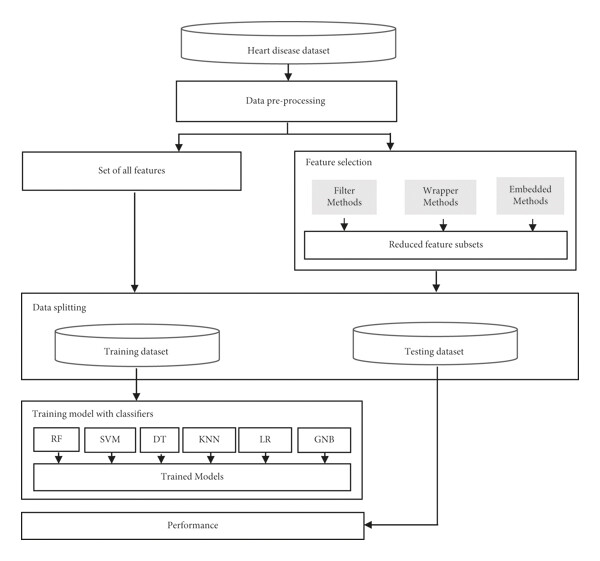

In [69]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('method.jpg')
cv2_imshow(img)

Referensi pengujian dalam pemilihan algoritma untuk classification :

Comparative Study on Heart Disease Prediction Using Feature Selection Techniques on Classification Algorithms (2021) by Kaushalya Dissanayake, Md Gapar Md Johar


Link : https://onlinelibrary.wiley.com/doi/epdf/10.1155/2021/5581806

In [51]:
data = 'EASKOMNUM.csv'

df = pd.read_csv(data)
print(df.head())
# Memeriksa kolom yang ada dalam DataFrame
print("Kolom dalam DataFrame:", df.columns)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  num  
0  0    6    0  
1  3    3    2  
2  2    7    1  
3  0    3    0  
4  0    3    0  
Kolom dalam DataFrame: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [52]:
# Mengonversi kolom yang memiliki nilai string menjadi numerik jika diperlukan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data setelah konversi nilai string menjadi numerik:")
print(df.head())

Data setelah konversi nilai string menjadi numerik:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [53]:
# Mengisi nilai yang hilang dengan KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("Data setelah imputasi nilai yang hilang:")
print(df_imputed.head())

Data setelah imputasi nilai yang hilang:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0  0.0  
1    2.0  3.0   3.0  2.0  
2    2.0  2.0   7.0  1.0  
3    3.0  0.0   3.0  0.0  
4    1.0  0.0   3.0  0.0  


In [54]:
# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
columns_to_normalize = df.columns.difference(['num'])
df_normalized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
df_normalized['num'] = df['num']
print("Data setelah normalisasi:")
print(df_normalized.head())

Data setelah normalisasi:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  num  
0  0.370968    1.0  0.000000  0.75    0  
1  0.241935    0.5  1.000000  0.00    2  
2  0.419355    0.5  0.666667  1.00    1  
3  0.564516    1.0  0.000000  0.00    0  
4  0.225806    0.0  0.000000  0.00    0  


In [55]:
# fitur dan label kita pisahkan dulu (asumsi kolom terakhir adalah label)
X = df_normalized.iloc[:, :-1]
print("Fitur (X) setelah dipisahkan:")
print(X.head())
y = df_normalized.iloc[:, -1]
print("Label (y) setelah dipisahkan:")
print(y.head())

Fitur (X) setelah dipisahkan:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.000000  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.000000  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.000000  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.333333  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  slope        ca  thal  
0  0.370968    1.0  0.000000  0.75  
1  0.241935    0.5  1.000000  0.00  
2  0.419355    0.5  0.666667  1.00  
3  0.564516    1.0  0.000000  0.00  
4  0.225806    0.0  0.000000  0.00  
Label (y) setelah dipisahkan:
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [56]:
# Konversi label menjadi tipe kategori
y = y.astype('int')
print("Label (y) setelah konversi ke tipe kategori:")
print(y.head())

Label (y) setelah konversi ke tipe kategori:
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [63]:
feature = df.drop('num', axis=1)
target = df['num']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (242, 13)
Testing set size: (61, 13)


In [64]:
# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
print("Fitur pelatihan (X_train):")
print(X_train.head())
print("Label pelatihan (y_train):")
print(y_train.head())
print("Fitur pengujian (X_test):")
print(X_test.head())
print("Label pengujian (y_test):")
print(y_test.head())

Fitur pelatihan (X_train):
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
121  0.708333  0.0  1.000000  0.528302  0.641553  0.0      1.0  0.633588   
123  0.541667  1.0  1.000000  0.433962  0.207763  0.0      0.0  0.305344   
172  0.625000  0.0  1.000000  0.754717  0.280822  0.0      0.0  0.549618   
40   0.750000  0.0  1.000000  0.528302  0.226027  0.0      1.0  0.328244   
131  0.458333  1.0  0.666667  0.000000  0.230594  0.0      0.0  0.633588   

     exang   oldpeak  slope        ca  thal  
121    0.0  0.645161    0.5  1.000000   1.0  
123    1.0  0.903226    1.0  0.000000   1.0  
172    1.0  0.000000    0.5  0.000000   0.0  
40     0.0  0.161290    0.5  1.000000   1.0  
131    1.0  0.000000    0.0  0.333333   1.0  
Label pelatihan (y_train):
121    4
123    3
172    1
40     4
131    0
Name: num, dtype: int64
Fitur pengujian (X_test):
          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
79   0.604167  1.0  1.000000  0.528302  0.

In [65]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_lr)*100
report = classification_report(y_test, y_pred_lr,zero_division=1)

print("Accuracy: {:.2f}%".format(accuracy))
print("Classification Report:\n", report)

Accuracy: 67.21%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.25      0.38      0.30         8
           2       0.33      0.09      0.14        11
           3       0.67      0.50      0.57         8
           4       0.00      1.00      0.00         0

    accuracy                           0.67        61
   macro avg       0.42      0.59      0.38        61
weighted avg       0.65      0.67      0.64        61

